## <center>Python Generators in Numerical Study of Discrete Dynamical Systems</center>

In this IPython Notebook we present generators as an excelent tool provided by Python for computational mathematics in general, and for the numerical study of 
discrete dynamical systems in particular. 

Generators functions form a special class of functions. In order to understand objects that are returned by these functions we recall  a few details about iterable objects and   iterators in Python.



A container in Python  is an object that contains other objects (example of containers are lists, tuples, strings, files, etc).  

A container, `container`, is  iterable if it is allowed to run over its items 
with a <tt>for</tt> statement:
<pre>
for item in  container:
    print(item)
</pre>
The lists, strings and tuples are iterable objects.  Dictionaries and files are also iterable.

Iteration is the process of accessing and returning  one item  at a time from a container.

Examples:

In [1]:
L = [2, 5, 1]#list
for k in L:
    print(k)

2
5
1


In [2]:
S = "string"
for c in S:
    print(c)

s
t
r
i
n
g


In [3]:
T=(4, 9, 7)#tuple
for t in T:
    print(t)

4
9
7


The iteration over a dictionary  `d` returns its keys:

In [4]:
d={'lst': [4,7,1], 'today': 'monday', 'nr': 10}

for item in d:
    print(item)

lst
today
nr


An iteration over a file object returns the file's lines:

In [5]:
f = open("toyfile.txt")# f is a file object i.e.  a container for the file's lines 
for line in f:
    print(line)

this is the first line

second line

final line



The above examples are built-in iterable objects  in Python. 


### Iterators

 Intuitively, an iterator is an object that produces a stream of items,  according to a prescribed protocol.  

From the programming language point of view an  iterator is an object of a class that has the methods `__iter__`, and `__next__`. By the  iterator protocol these methods act as follows:

The `__iter__` method returns the iterator object itself, and the `__next__` method returns the next item of the stream.



How does a container, that is an iterable object, relate with an iterator?

The built-in function `iter` takes  a container and returns an iterator.

In all the above examples,  `for item in container` launches the iterator protocol.
 The `for` statement calls `iter()` on the container object. 

  -  `it=iter(container)` is an iterator object and by calling   `next(it)`
    are accessed the  container's items, one at a time. 

  - When there are no more items, `next(it)`
    raises a `StopIteration` exception,  which  forces the `for` loop to terminate.
   

Let us explicitly call `iter()` on the list, L,  and file object f, defined above:


In [6]:
it_list=iter(L)
print (next(it_list), next(it_list), next(it_list))

2 5 1


In [7]:
it_file = iter(f) # iterator associated  to the file object f
print(next(it_file))


StopIteration: 

We notice that  calling three times the next() method for the iterator associated to the list, L,
 all three  items are successively returned, while a single call `next(it_file)`  for the iterator associated to the file object, raises the `StopIteration`
exception. This means that the stream of lines was exhausted when we called `for line in f`, and no 
 line can be accessed again.


If we reopen the file its lines are also accessible:


In [8]:
it_f = iter(open('toyfile.txt'))
for _ in range(3):
    print(next(it_f))


this is the first line

second line

final line



Hence the  iterators associated to built-in containers can exhibit  different behaviours. While the lists can be iterated as many times as we want, a file can be iterated only once after it was open.

The reader can experiment the behavior of the iterators `iter(S)`, `iter(T)`, and `iter(d)`, associated to the string S,
tuple, T, and dictionary, d, defined above.

We conclude that:

Iterables are objects that define an iterator when they are passed to the `iter()` built-in function.

### Generators

Generators functions provide a  powerful tool for creating iterators.

A generator function is defined as any function in Python using `def`.

A function is a generator function if it contains one or more  <tt> yield </tt>  statements within its body.

The generator function below will generate   multiple of 3  of positive integer numbers, less than $n$:

In [9]:
def gen_mult3(n):
    k = 0
    while k < n:
        yield 3*k
        k += 1

The first call of the generator function defines a generator, i.e. a  particular iterator object:

In [10]:
G = gen_mult3(5)
print(G)

<generator object gen_mult3 at 0x000001F024CC2CF0>


After this call  the numbers 0, 3, 6, 9, 12 are not yet generated as we could expect.

Iterating the generator G (which is an iterator), by calling successively `next(G)`,
 these numbers are produced one at atime, and at the sixth call a `StopIteration` exception is raised, because the generator exhausted:

In [11]:
for _ in range(6):
    print(next(G))

0
3
6
9
12


StopIteration: 

A generator makes a lazzy evaluation, meaning that  it yields a value (an object) only  on demand
(when it is needed).

In order to understand the difference between a Python generator function and a regular function, we recall how behaves
a regular function that contains at least  a <tt>return </tt> statement. 

At each call of a regular function a private namespace is associated. 
When a  return line is reached in execution,  the local variables are destroyed
and the computed object (value) is returned.



In the case of a generator, after each  yielded value (with `yield`) the function freezes, i.e. 
     stops its execution. When it is called again, it resumes its execution at the point where it stopped (it "remembers"  the last yielded value, and the last executed  statement).

To illustrate this behaviour, we insert a few  `print` lines in the definition of the generator function above:

In [12]:
def Gen_mult3(n):
    print('this is the first line of the generator function')
    k = 0
    while k < n:
        print('line before yield')
        yield 3*k
        print ('line after yield')
        k+=1
    print( 'this is the last line of the generator function')    

Define the generator:

In [13]:
gen = Gen_mult3(3)

Running the above cell no string was printed. Hence at the first call the generator  is only created  and no line of the function's body is executed.

Now we iterate the generator `gen`:

In [14]:
print(next(gen))

this is the first line of the generator function
line before yield
0


In [15]:
print(next(gen))

line after yield
line before yield
3


In [16]:
print(next(gen))

line after yield
line before yield
6


In [17]:
print(next(gen))

line after yield
this is the last line of the generator function


StopIteration: 

Note that Python generators do not give  access to previously generated items,
unless the user  explicitly stored them in some container  (for example in  a list).

If we want to iterate again over data produced by a  generator  we  have to
re-call the generator function, i.e to re-define the generator.

Here is an example of storing the generated values in a list:

In [18]:
ge = gen_mult3(6)
L = [next(ge) for _ in range(6)]
print(L)

[0, 3, 6, 9, 12, 15]


A natural question is whether the builtin `range` function is a generator or not:

In [20]:
R = range(-4, 6, 2)
print(type(R))

<class 'range'>


R can be converted to a list:

In [21]:
list(R)

[-4, -2, 0, 2, 4]

or to an iterator:

In [22]:
it_r = iter(R)
print(next(it_r), next(it_r))

-4 -2


Hence `range` is not a generator. It is a  class of immutable iterable objects.

### Python generators in Computational Mathematics

Generators allow  to deal with infinite streams of "mathematical objects".

For example, a sequence of real or complex numbers is an infinite mathematical object.

Let $a_n=\left(1+\displaystyle\frac{1}{n}\right)^n$, $n\geq 1$, be the sequence that is known as being convergent to the  number e.

Its terms can be generated by the folowing generator function:

In [23]:
def genseq_e():
    n = 1
    while True:
        yield (1.0+1.0/n)**n
        n += 1      

Suppose  we want to see how far is $a_{1000}$ from the sequence's limit, $e$.  To generate $a_{1000}$ we simply can
iterate the generator `G=genseq_e()`:

In [24]:
G = genseq_e()
for _ in range(1, 1000):
    next(G)
    # the last generated value is a999
a1000 = next(G)
print(a1000)

2.7169239322355936


In [25]:
import math

In [26]:
print (a1000, math.exp(1), math.fabs(a1000-math.exp(1.0)) )

2.7169239322355936 2.718281828459045 0.0013578962234515046


A more elegant solution is to  slice the infinite generator, using `itertools.islice`
 [https://docs.python.org/3/library/itertools.html](https://docs.python.org/3/library/itertools.html).

`itertools` is a  Python module that contains functions for creating iterators. In particular it allows 
 to work  effectively with generators.


When a generator `G` is iterated, the values returned by `next(G)` are counted like the items in any Python sequence.

A slice:

 `itertools.islice(generator, start, stop, step)`, 
 
 (where `start`, `stop`, and `step` have the same significance as  for the 
`range(start, stop, step)`)
is an iterator that produces the generator values (objects) counted from index equal to `start`.

The iterator `itertools.islice(generator, n)`    is supposed to have  `start=0`, `stop=n`, and  `step=1`.                                                           

Hence to get the term $a_{1000}$ of the sequence $a_n$, we proceed as follows:

In [27]:
from itertools import islice

In [28]:
gg = genseq_e()
list(islice(gg, 1000, 1001)) #start=1000, stop=1001

[2.716925287534764]

Hence the slice contains  just an element: a1000. To get it we could proceed as follows:

In [29]:
gg = genseq_e()
a1000 = next(islice(gg, 1000, 1001)) # i.e. the next element of the iterator is its unique element a1000
print(a1000, math.exp(1), math.fabs(a1000-math.exp(1.0)) )

2.716925287534764 2.718281828459045 0.0013565409242812798


Python generators can be defined in many contexts of the Computational Math, but here we show how they can be defined and manipulated to study a discrete dynamical system.

### Python generators in the  study of discrete dynamical systems

A discrete dynamical system on the space $\mathbb{R}^m$,  is defined usually by a one-to-one
differentiable  or only a continuous map, $f:\mathbb{R}^m\to\mathbb{R}^m$. If $x_0\in\mathbb{R}^m$ is the initial state, its orbit or trajectory  is the sequence  $(x_n)_{n\in\mathbb{N}}$,  $x_n=f^n(x_0)$, where $f^n$, $n\geq 1$,  is the $n^{th}$ iterate of the map.

The goal of the dynamical system theory is to understand the asymptotic behaviour of  the systems' orbits.

In the case of a two-dimensional dynamical system we can plot a set of orbits, and the visual representation we get is called  the *phase portrait* of that system.

In order to illustrate the asymptotic behaviour of an orbit or to draw the phase portrait of a two-dimensional dynamical system, it is very useful to define a generator
for an orbit.

The generator will produce one point at a time or if it is  necessary, we can take a slice in the infinite generator and store its points in a `list` or a `numpy.array`.

Experimenting with generator functions that generate points on an orbit,   we deduced that there is a trick in the process of  creation of a list of points resulted by iterating a  slice in that generator.

To illustrate how we were lead to that trick  we define a generator of an orbit  for a version of the [H&eacute;non map](http://en.wikipedia.org/wiki/H%C3%A9non_map): 

$$(x,y)\mapsto(y, 1-1.4 y^2+0.3x)$$



In [30]:
def gen_Henon(pt0): #pt0 is the initial point given as 2-list
    if not isinstance(pt0, list):
        raise ValueError("pt0 must be a tuple")
    pt = pt0[:] # a copy of the initial point
    while True:
        yield pt
        tmp = pt[0]
        pt[0] = pt[1]
        pt[1] = 1 - 1.4 * pt[1]**2 + 0.3*tmp
    

In [31]:
pt0 = [0.0, 0.0]
G = gen_Henon(pt0)

Let us iterate a   slice in this generator:

In [32]:
for pt in islice(G, 5, 8):
    print (pt)

[-0.7408864000000001, 0.554322279213056]
[0.554322279213056, 0.3475516150752599]
[0.3475516150752599, 0.9971877085659265]


Usually to plot an orbit of some length we store  its points  in a list, and plot it with a single call of `plt.scatter`, instead of plotting one point at a time as it is generated.

Trying to store the above three points in a list created by comprehension, we notice that the list
contains only the last point, displayed three times:

In [33]:
print(pt0)
G = gen_Henon(pt0)# to reiterate the slice we have to call the generator function again
L1 = [pt for pt in  islice(G, 5, 8)]
print(L1)

[0.0, 0.0]
[[0.3475516150752599, 0.9971877085659265], [0.3475516150752599, 0.9971877085659265], [0.3475516150752599, 0.9971877085659265]]


Why does the iteration work well when we only iterate the generator, but it fails when trying to create a list from items resulted from the iteration?

The same drawback is manifested when we define the generator function with the argument
 `pt0`  given as a `numpy.array`,
and replace the line `pt=pt0[:]` with `pt=pt0.copy()`.

After  trial and error experimentation we got  a correct list of items   in the following way:

In [35]:
pt0 = [0.0, 0.0]
G = gen_Henon(pt0)
L3 = [list(pt) for pt in islice(G, 5, 8)]
print(L3)

[[-0.7408864000000001, 0.554322279213056], [0.554322279213056, 0.3475516150752599], [0.3475516150752599, 0.9971877085659265]]


This behaviour is really strange, because each `pt` was a list object and this conversion appears
to be redundant.

A similar right result we get converting each `pt` to a `numpy.array`:

In [36]:
import numpy as np

In [37]:
G = gen_Henon(pt0)
L4 = [np.array(pt) for pt in islice(G, 5, 8)]
print(L4)

[array([-0.7408864 ,  0.55432228]), array([0.55432228, 0.34755162]), array([0.34755162, 0.99718771])]


A third solution is to explicitly set the type of the object to be  yielded by the generator:

In [39]:
def gen_Henon_new(pt0):
    if not isinstance(pt0, list):
        raise ValueError("pt0 must be a list")
    pt = pt0[:]
    while True:
        yield pt
        tmp = pt[0]
        pt = [pt[1], 1-1.4*pt[1]**2+0.3*tmp]#pt is explicitly set as list    

In [40]:
G = gen_Henon_new(pt0)
L5 = [pt for pt in islice(G, 5,8)]
print (L5)

[[-0.7408864000000001, 0.554322279213056], [0.554322279213056, 0.3475516150752599], [0.3475516150752599, 0.9971877085659265]]


We note that when the yielded object  is explicitly set as list, no conversion is needed when we create the list of 
 items resulted from the iteration.

Let us check this observed particularity for another generator.

Namely, we define the generator of pairs of consecutive terms in [Fibonacci sequence](http://en.wikipedia.org/wiki/Fibonacci_number): 

In [41]:
def pair_fibonacci(a=1, b=1):
    while True:
        yield (a,b)# the yielded object is explicitly set as a tuple
        a, b = b, a+b


In [42]:
genp = pair_fibonacci()
L = [pair for pair in islice(genp, 1,15)]
print (L)

[(1, 2), (2, 3), (3, 5), (5, 8), (8, 13), (13, 21), (21, 34), (34, 55), (55, 89), (89, 144), (144, 233), (233, 377), (377, 610), (610, 987)]


The sequence of pairs $(p_n, q_n)$,   $p_1=1, q_1=2$,  produced by this generator, defines the  convergents, 
$p_n/q_n$, of the continued fraction expansion of the inverse $1/\phi$ for the [golden ratio](http://mathworld.wolfram.com/GoldenRatio.html)
$\phi=(1+\sqrt{5})/2$.

In the study of the [dynamics of twist maps](http://amath.colorado.edu/pub/dynamics/papers/Raglan2011_pt2.pdf), these pairs represent the rotation numbers
of the periodic orbits, converging to the invariant 1-dimensional torus (or cantorus) having the rotation number,
$1/\phi$.

Now we illustrate the phase portrait of the [standard map](http://www.scholarpedia.org/article/Chirikov_standard_map) whose orbits are generated by a generator function.

 The standard  map, $f$, is defined on the infinite annulus $\mathbb{S}^1\times \mathbb{R}$.
$\mathbb{S}^1=\mathbb{R}/\mathbb{Z}$ is the unit circle identified with the interval $[0,1)$ or any other real 
                                                                  interval of length 1.
                                                                
$f$ maps $(x,y)$ to $(x', y')$, where:

$$ \begin{align}
x'&= x+y'\: (modulo\: 1)\\
y'&= y-\displaystyle\frac{\epsilon}{2\pi}\sin(2\pi x), \quad \epsilon\in\mathbb{R}
\end{align}$$



In [ ]:
def moduloAB(x, a, b):
    if a >= b:
        raise ValueError('Incorrect interval ends')
    return (x-a) % (b-a) + a        

In [60]:
def stdmap(pt):
    global eps
    pt[1] -= eps*np.sin(2*np.pi*pt[0])/(2.0*np.pi)
    pt[0 ]= np.mod(pt[0]+pt[1], 1.0)
    return pt

We define an orbit generator, and a function that returns a `numpy.array` containing the points of an orbit:

In [61]:
def gen_stdmap(pt0) :
    if not isinstance(pt0, list):
        raise ValueError("pt0 must be a list")
    pt = pt0[:]
    while True:
        yield pt
        pt = stdmap(pt) # here pt is not explicitly defined as a list

In [62]:
def orbit_stdmap(pt0, n):
    G = gen_stdmap(pt0)
    return np.array([list(next(G)) for _ in range(n)]) #conversion   list(G.next())  is needed for
                                                         # a right iteration

Let us check first that the function `orbit_stdmap` works correctly:

In [63]:
eps = 0.971635#  define the global parameter for the standard map
pt0 = [0, 0.57]
orb= orbit_stdmap(pt0, 10)
print(orb)

[[0.         0.57      ]
 [0.57       0.57      ]
 [0.20584273 0.63584273]
 [0.69295879 0.48711606]
 [0.32488936 0.63193057]
 [0.81898545 0.49409609]
 [0.45342134 0.63443589]
 [0.04324307 0.58982173]
 [0.59156338 0.54832031]
 [0.22402276 0.63245939]]


In the sequel  we plot interactively a few orbits of the standard map, corresponding to the fixed parameter $\epsilon$.
Each orbit is colored with a color from a list of colors that is  cyclically iterated.

If we set the  matplotlib backend `notebook`:

`%matplotlib notebook`  

the phase portrait (i.e. the resulted figure) is inserted inline.

In [64]:
from itertools import cycle

In [65]:
cols = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef'] #brewer colors
colors = cycle(cols)# colors= cyclic iterator

The initial point of each orbit is chosen with a   left mouse button click  within the pop-up window
that opens when running the cell below. 

When we have drawn a sufficient number of orbits such that 
the structure of the phase portrait is evident, 
 we    press the right button of the mouse and  run the next cell.


In [66]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


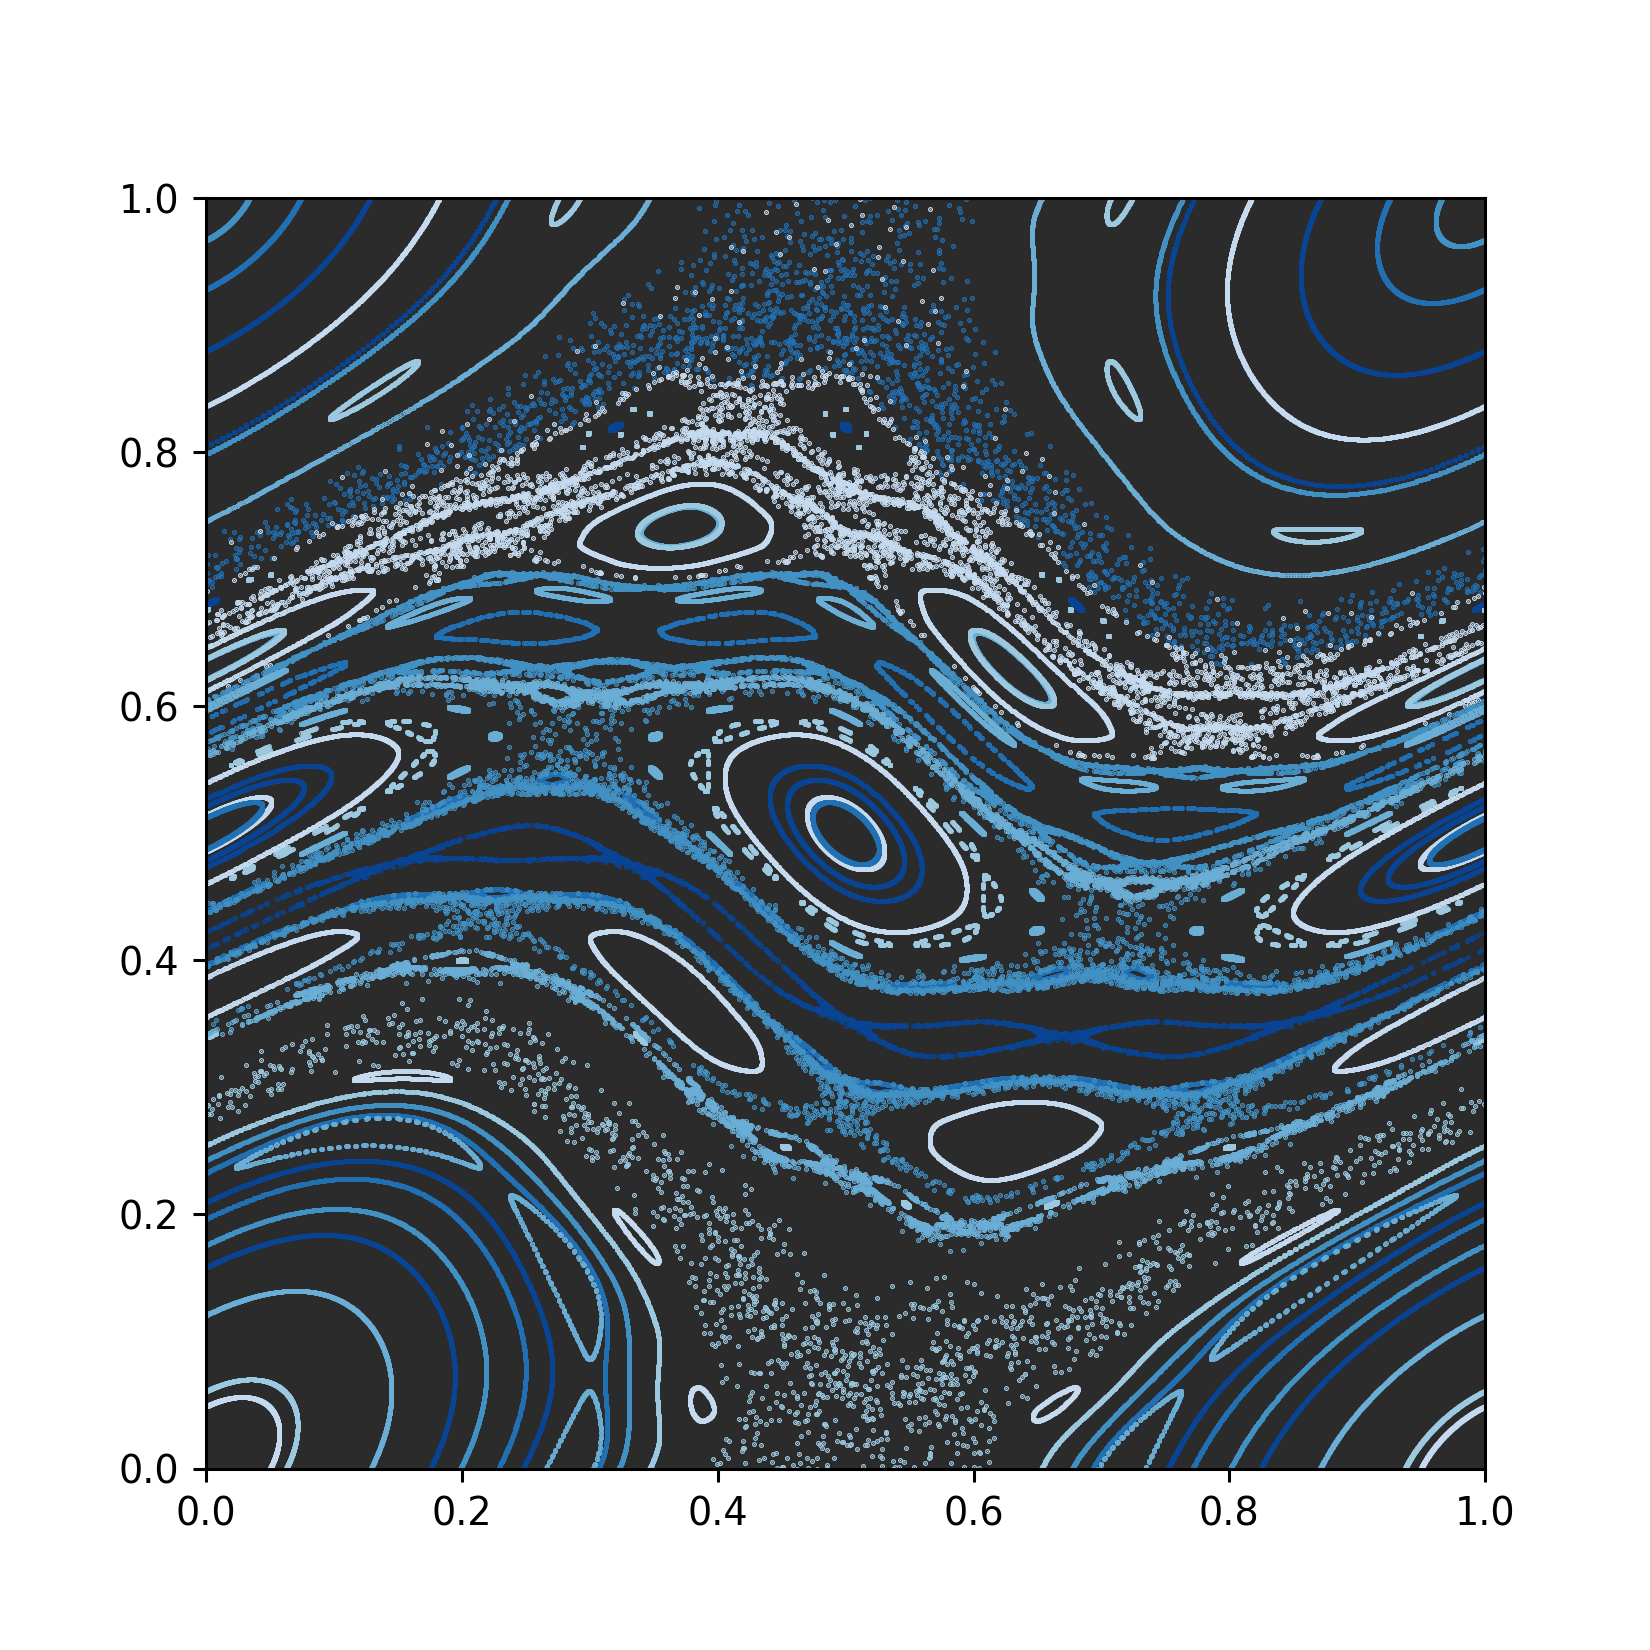

In [71]:
def onclick(event):
    #If the left mouse button is pressed: draw an orbit
    tb = plt.get_current_fig_manager().toolbar
    n=3000
    
    if event.button == 1 and event.inaxes and tb.mode == '':
        x,y = event.xdata,event.ydata
        pt0 = [x,y]
        orbit_points = orbit_stdmap(pt0, n)
        plt.scatter(orbit_points[:,0], orbit_points[:,1],  s=0.1,  color=next(colors))  
        plt.draw()
    else:
        pass    

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_facecolor('#2B2B2B')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_autoscale_on(False)
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

The  generator of an orbit can be used for plotting a (chaotic) attractor of a discrete dynamical system, that is
a set $A\subset\mathbb{R}^2$, such that for any point $x_0$ sufficiently close to $A$, the distance
between the $n^{th}$ point, $x_n=f^n(x_0)$, of its orbit and $A$ tends to 0, as $n\to\infty$.

### Ikeda Attractor

[Ikeda map](http://en.wikipedia.org/wiki/Ikeda_map) is a chaotic map of the two dimensional space $\mathbb{R}^2$ into itself. Its expression can be summarized
in complex plane by $f(z)= A+Bze^{i(C+D/(||z||^2+1)}$. 

We define the generator function of an orbit of the Ikeda map, corresponding to  particular parameters $A,B,C,D$, for which the map
exhibits a chaotic attractor.

We plot  a slice into a long orbit, neglecting the first 300 points, to ensure that the remaining points approach the attractor very well.

In [72]:
%matplotlib inline

In [73]:
def gen_Ikeda(z0):
    z = z0
    while True:
        yield z
        z = 0.97 + 0.9 * z * np.exp(1j*(0.4-6/(np.abs(z)**2+1)))

In [74]:
z0 = 0.0+1j*0
gik = gen_Ikeda(z0)
aikeda=np.array([z for z in islice(gik, 300, 20000)])

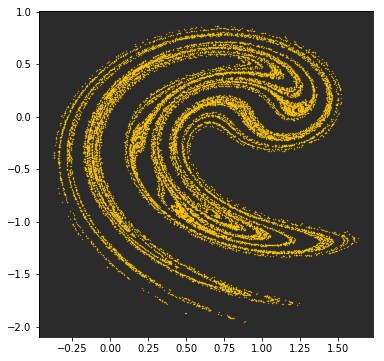

In [75]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_facecolor('#2B2B2B')
plt.scatter(aikeda.real, aikeda.imag, color= '#FFC800', s=0.1)   

### Generator for an IFS  fractal

Generators are also useful for generating points of a fractal set defined by an [IFS](http://en.wikipedia.org/wiki/Iterated_function_system) or an IFS with probabilities, 
that is a finite number of affine contractions, that are chosen according to an assigned probability.



An affine map, $\mathcal{A}$, defined on the two-dimensional plane is defined by a $2\times 2$ matrix $T$, and  a point  $P(a_0, a_1)$:
    
  $$\left[\begin{array}{c} x\\y\end{array}\right] \mapsto P+ T\left[\begin{array}{c} x\\y\end{array}\right]$$ 

The fractal set defined by an IFS consisting in n affine contractions, $C_0, C_1, \ldots, C_{n-1}$, is an invariant set $A$ of the IFS, that is:
    $$A=\bigcup_{k=0}^{n-1}C_k(A)$$

We give the parameters of a contraction as a `numpy.array` of shape (6,). The first four entries correspond to the matrix $T$, and the last two entries are the coordinates of the point $P$.

Next we plot a fractal set which is the attractor of an IFS consisting in three contractions with probabilities:

In [76]:
C = [np.array([.4398,  .2848,  .007, .4958,   20.27824, 23.51717]),
     np.array( [-.2303, .7265, .2381 , .0952,   32.82897,  11.46771]),
     np.array([ -.3898, .5371, .4751, .5017, 15.75347,  -5.22511])]

In [77]:
pr=[ .2507,  .2262,  .5231]#probabilities

Starting with an initial point `pt0`, one generates the  points $C_{i_{m-1}}\circ\cdots \circ C_{i_0}(pt0)$, $m=\overline{1,15000}$,
where each contraction $C_{i_k}$ is chosen according to the discrete probability distribution on the set of contractions' indices $[0,1,2]$,  of probabilities $pr[0], pr[1], pr[2]$.

In [78]:
from numpy.random import choice

In [79]:
ind = np.arange(3)# indices for the contractions C[0], C[1], C[2]

In [80]:
def gen_IFS(pt0):
    pt = pt0[:]
    while True:
        yield pt
        i = choice(ind, p=pr)# choose the contraction index  
                           
        pt = np.dot(C[i][:4].reshape(2,2), pt) + C[i][4:]

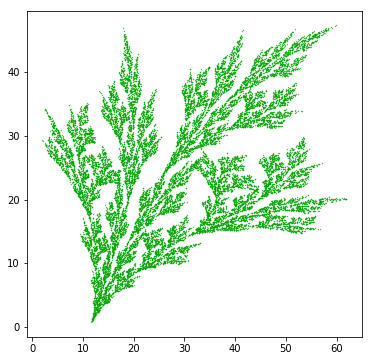

In [83]:
pt0 = np.zeros(2, float)
G = gen_IFS(pt0)
attractor = np.array([pt  for pt in islice(G, 1000, 25000)])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
#ax.set_facecolor('#000000')
plt.scatter(attractor[:,0], attractor[:,1], color= '#00A300', s=0.1)    

Another application of generator functions in the study of discrete dynamical systems can be in the
computation of the derivative of the map defining the system, along an orbit, $(x_n)$, that is:
    $$Df^n(x_0)=Df(x_{n-1})\cdots  Df(x_1) Df(x_0)$$
   The derivative along a long orbit is needed for  computing the Lyapunov exponent  of that orbit  or in the case of twist maps, such as the standard  map, to derive the stability type of a periodic orbit.

If `gen_orbit(pt0)` is the generator of an orbit, `jacobian(pt0)` is the matrix representing the derivative
`Df(pt0)`, then the generator for the derivative along the orbit starting at `pt0` would be defined as follows:

In [84]:
def gen_Deriv(pt0):
        J = np.eye(2)
        while True: 
            J = np.dot(jacobian(next(gen_orbit(pt0))), J)
            yield J        

`next(islice(gen_Deriv(pt0), n-1, n))` is the matrix of the derivative Dfn(pt0)

In [86]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()